# Week 3 Exercises

## Part 1: Small World Networks

**Q:** What's the problem with random networks as a model for real-world networks according to the argument on p. 11-12?

Random networks tend to have very limited outliers, specifically all nodes have a degree in the narrow vicinity of ⟨k⟩. In real-world networks there is more outliers, for example people with many friends and people with very little. 

**Q:** List the four regimes that characterize random networks as a function of ⟨k⟩.

* Subcritical Regime: 0 ‹ ‹k› ‹ 1 
* Critical Point: ‹k› = 1
* Supercritical Regime: ‹k› › 1
* Connected Regime: ‹k› › lnN

**Q:** According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

Degree-dependent clustering decreasing as a function of k for random networks is an issue because in real-world networks we actually expect that the clustering will increase as a function of k.

**Q:** Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,1. Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes
N = 500
# Average degree
k = 4

# Create 3 graphs with varying rewiring probabilities
WS1 = nx.watts_strogatz_graph(N, k, p=0)
WS2 = nx.watts_strogatz_graph(N, k, p=0.1)
WS3 = nx.watts_strogatz_graph(N, k, p=1)

# Compute average shortest path length for each of the graphs
d_WS1 = nx.average_shortest_path_length(WS1)
d_WS2 = nx.average_shortest_path_length(WS2)
d_WS3 = nx.average_shortest_path_length(WS3)

# Plot the distances compared to their respective rewiring probabilities 
plt.plot([0, 0.1, 1], [d_WS1, d_WS2, d_WS3])
plt.show()

print d_WS1, d_WS2, d_WS3

As p=1, the network increases in connectedness. What is happening is the network is taking more 'shortcuts' and components that normally wouldn't be connected (or you wouldn't expect to be) are now connected.

In [50]:
expected_d = math.log(N)/math.log(4)
print 'lnN/ln<k>=%s' % expected_d

def ws_change_p(p):
    WS = nx.watts_strogatz_graph(500, 4, p)
    d_WS = nx.average_shortest_path_length(WS)
    return (p, d_WS)

print 'p=%s, <d>=%s' % ws_change_p(0.2)
print 'p=%s, <d>=%s' % ws_change_p(0.3)
print 'p=%s, <d>=%s' % ws_change_p(0.4)
print 'p=%s, <d>=%s' % ws_change_p(0.5)
print 'p=%s, <d>=%s' % ws_change_p(0.6)
print 'p=%s, <d>=%s' % ws_change_p(0.9)

lnN/ln<k>=4.48289214233
p=0.2, <d>=6.18388777555
p=0.3, <d>=5.60095390782
p=0.4, <d>=5.15013226453
p=0.5, <d>=5.01672144289
p=0.6, <d>=4.82885771543
p=0.9, <d>=4.76789579158


**Q:** Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [51]:
import numpy as np

count = 50

# Returns the average of <d> and the standard deviation for count graphs at probabilty p
def average_distance_at_p(N, k_av, p, count):
    d_WS_list = []
    for ii in range(0, count):
        WS = nx.watts_strogatz_graph(N, k_av, p)
        d_WS_list.append(nx.average_shortest_path_length(WS))
    return (np.average(d_WS_list), np.std(d_WS_list))
    
p_list = [0,0.01,0.03,0.05,0.1,0.2]
d_av_list = []
d_std_list = []

# go through list of probabilities and create list containing d_av and d_std using helper function above
for p in p_list:
    d_av, d_std = average_distance_at_p(N, k_av, p, count)
    d_av_list.append(d_av)
    d_std_list.append(d_std) 

In [ ]:
plt.errorbar(p_list, d_av_list, yerr=d_std_list)
plt.ylabel("average of n <d>, n=50")
plt.xlabel("probability, p")
plt.show()

## Part 2: Scale-free and Barabasi-Albert Model

### Network Science

**Q:** What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.

* Anomalous Regime (γ =< 2)
* Scale-Free Regime (2 < γ < 3)
* Random Network Regime (γ > 3)

Scale-free regime is when multiple large hubs begin to form which creates a network that is ultra-small since many smaller nodes will share the same hub.


**Q:** What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

Section 5.8 was not assigned in reading Ch5.1-5.5

### BA Model

First create the graph with one link.

In [3]:
BA = nx.Graph()

# create first node and link
BA.add_nodes_from([1,2])
BA.add_edge(1,2)

# add another node and choose to link 1 or 2
BA.add_node(3)
BA.add_edge(1,3)

print BA.nodes()
print BA.edges()

[1, 2, 3]
[(1, 2), (1, 3)]


General Algorithm for choosing random node using preferential attachement:

The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

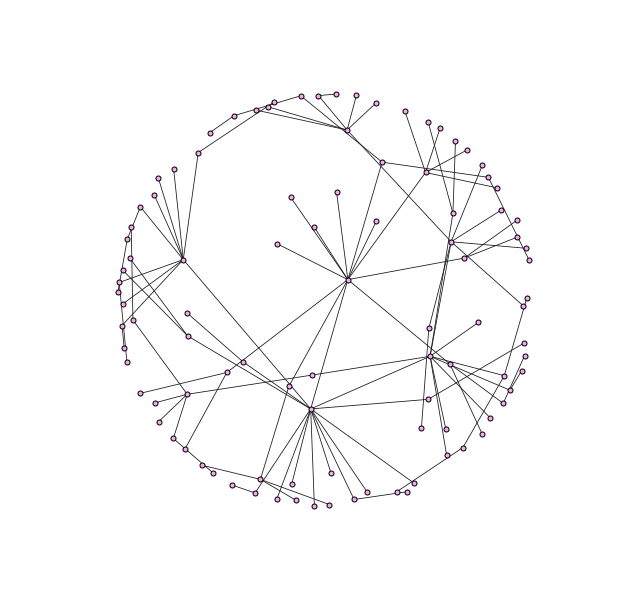

In [4]:
import random

def choose_random_node(G):
    # flattened list of all the edges, contains repeated elements (nodes) based on the amount of edges the node has
    connections = [node for edge in G.edges() for node in edge]
    # choose a random node
    return random.choice(connections)

N = 100

for node in range(len(BA.nodes())+1,N+1):
    BA.add_edge(node, choose_random_node(BA))

plt.figure(1,figsize=(8,8))
nx.draw(BA, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(BA))
plt.show()

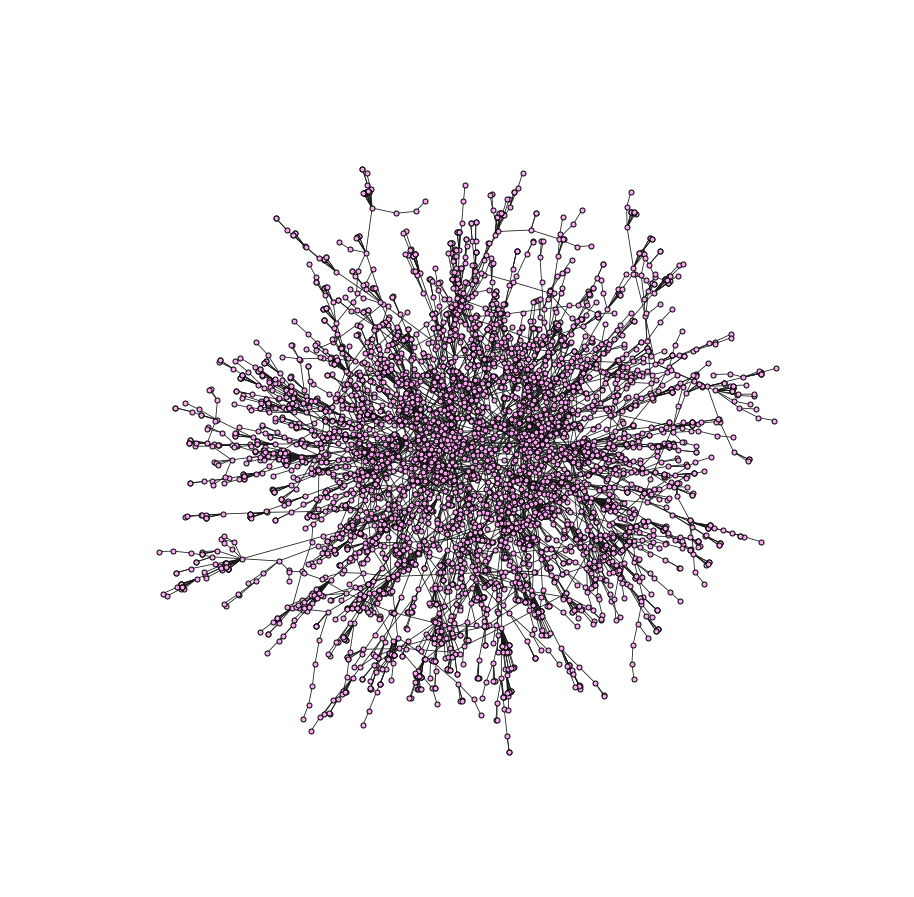

In [5]:
N = 5000
for node in range(len(BA.nodes())+1,N+1):
    BA.add_edge(node, choose_random_node(BA))

plt.figure(1,figsize=(12,12))
nx.draw(BA, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(BA))
plt.show()

In [45]:
degrees_BA = list(BA.degree(BA.nodes()).values())
max_num = max(degrees_BA)
min_num = min(degrees_BA)

print "Max degree = %s" % max_num
print "Min degree = %s" % min_num

Max degree = 106
Min degree = 1


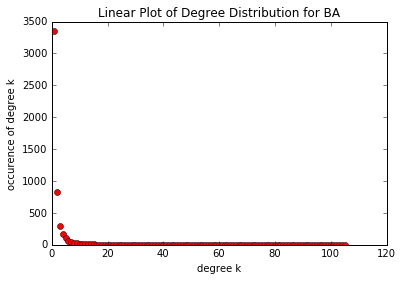

In [46]:
import numpy as np

bins = [num for num in range(min_num,max_num+1)]
hist, bin_edges = np.histogram(degrees, bins)

plt.plot(bin_edges[:-1], hist, 'ro')
plt.title("Linear Plot of Degree Distribution for BA")
plt.ylabel("occurence of degree k")
plt.xlabel("degree k")
plt.show()

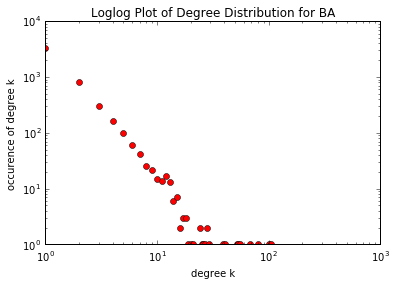

In [47]:
plt.loglog(bin_edges[:-1], hist, 'ro')
plt.title("Loglog Plot of Degree Distribution for BA")
plt.ylabel("occurence of degree k")
plt.xlabel("degree k")
plt.show()

### Friendship Paradox

* Pick a node i at random (e.g. use random.choice). Find its degree.
* Find i's neighbors. And calculate their average degree.
* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [32]:
# Pick a node i at random (e.g. use random.choice). Find its degree.
nodes = BA.nodes()
random_node = random.choice(nodes)
print BA.degree(random_node)

5


In [44]:
# Find i's neighbors. And calculate their average degree.
neighbors = nx.all_neighbors(BA, random_node)
average_degree = np.average(list(BA.degree(neighbors).values()))
print average_degree

8.0


In [34]:
# Repeating a 1000 times
N = 1000
total = 0

for n in range(0,N):
    nodes = BA.nodes()
    random_node = random.choice(nodes)
    node_degree = BA.degree(random_node)
    neighbors = nx.all_neighbors(BA, random_node)
    average_degree = np.average(list(BA.degree(neighbors).values()))
    if average_degree > node_degree:
        total += 1

print "Friendship paradox was true %s times" % total

Friendship paradox was true 862 times


Create an ER network and compare it to the BA network.

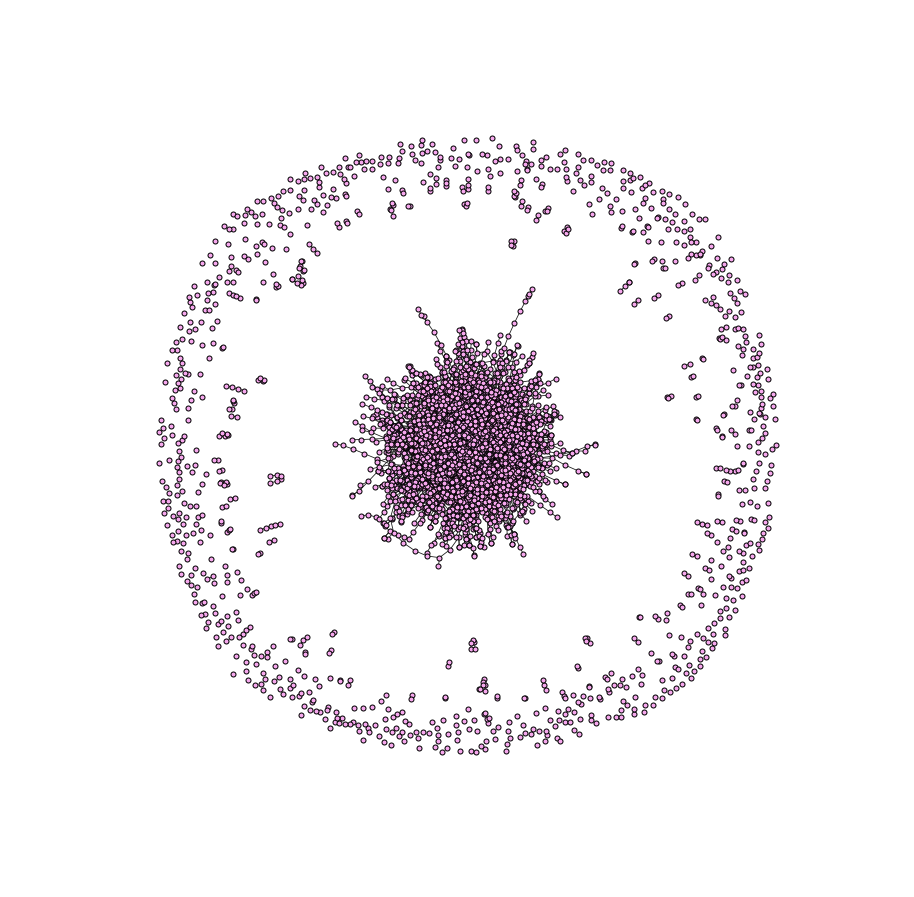

In [38]:
N = 5000
k_av = np.average(degrees_BA)
p = k_av / ( N - 1 )
ER = nx.erdos_renyi_graph(N, p)

pos = nx.spring_layout(ER)
plt.figure(1,figsize=(12,12))
nx.draw(ER, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=pos)
plt.show()

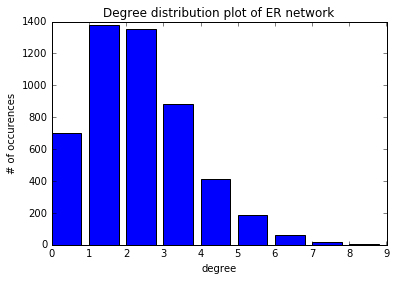

In [40]:
degrees_ER = list(nx.degree(ER).values())

# similar to before, find the max and min and create a bin vector containing all the numbers between them
max_num = max(degrees_ER)
min_num = min(degrees_ER)
bins = [num for num in range(min_num,max_num+1)]


hist, bin_edges = np.histogram(degrees_ER, bins=bins)
plt.bar(bin_edges[:-1], hist)
plt.title("Degree distribution plot of ER network")
plt.ylabel("# of occurences")
plt.xlabel("degree")
plt.show()

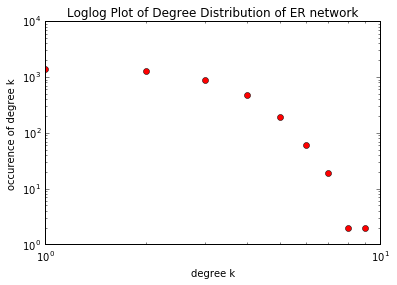

In [37]:
plt.loglog(bin_edges[:-1], hist, 'ro')
plt.title("Loglog Plot of Degree Distribution of ER network")
plt.ylabel("occurence of degree k")
plt.xlabel("degree k")
plt.show()

In [43]:
print "Connected components ER %s" % nx.number_connected_components(ER)
print "Connected components BA %s" % nx.number_connected_components(BA)

Connected components ER 853
Connected components BA 1


Two major differences between ER and BA network are:
* there is lots more variation of degrees in BA
* BA is a completely connected graph while ER contains isolated nodes

From the construction of the BA graph it is obvious that no isolated nodes will occur which explain the large difference between BA and ER. Looking at the degree distribution plots we can see that for BA networks the degree is ranging from 1-110 while in ER the degree ranges from 0-9. This effect is expected because BA implements preferential attachement.  